In [1]:
pollTrain = read.csv("poll_train_IMP_FE.csv")
pollTest = read.csv("poll_test_IMP_FE.csv")

In [2]:
str(pollTrain)

'data.frame':	5561 obs. of  108 variables:
 $ USER_ID        : int  1 4 5 8 9 10 11 12 13 15 ...
 $ YOB            : int  77 45 18 32 31 18 32 19 19 34 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 1 2 2 1 1 2 2 2 1 ...
 $ Income         : num  125 170 87.5 125 62.5 170 37.5 87.5 12 62.5 ...
 $ HouseholdStatus: Factor w/ 6 levels "Domestic Partners (no kids)",..: 4 2 5 4 4 5 3 5 5 4 ...
 $ EducationLevel : Factor w/ 7 levels "Associate's Degree",..: 1 2 6 2 6 3 4 3 3 6 ...
 $ Q124742        : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 2 2 1 1 ...
 $ Q124122        : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 1 2 1 1 ...
 $ Q123464        : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 2 1 ...
 $ Q123621        : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 1 1 ...
 $ Q122769        : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 2 2 ...
 $ Q122770        : Factor w/ 2 levels "No","Yes": 2 2 2 1 2 2 2 2 2 1 ...
 $ Q122771        : Factor w/ 2 levels "Private","Public

In [3]:
library(caret)
library(mlbench)
control <- rfeControl(functions=rfFuncs, method="cv", number=20)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.3.0Warning message:
: package ‘mlbench’ was built under R version 3.3.0

In [9]:
esults <- rfe(pollTrain[,setdiff(names(pollTrain),c("USER_ID","Party"))], pollTrain$Party, sizes=c(1:15), rfeControl=control)

In [10]:
predictors(esults)

[1] "Q109244" "Q115611" "Q98197"  "Q113181" "Q98869"

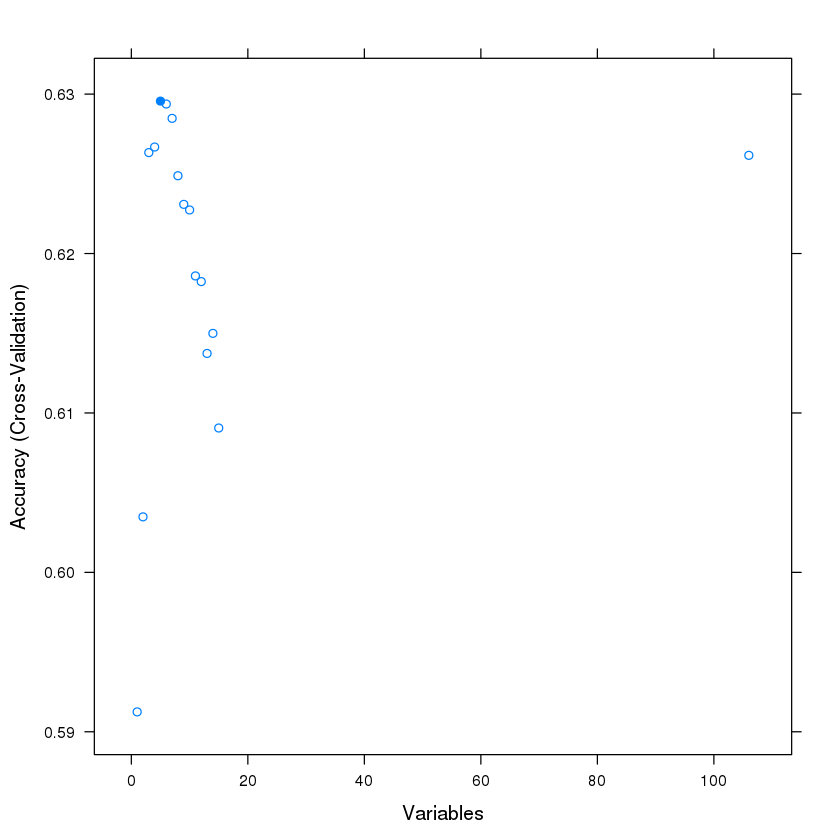

In [11]:
plot(esults)

In [12]:
library(rpart)

In [13]:
library(caTools)

In [23]:
Tree1 = rpart(Party~Q109244+Q115611+Q98197+Q113181+Q98869, data = pollTrain, method = "class",cp=0.001)

In [24]:
t = table(pollTrain$Party,predict(Tree1,type = "class"))
t
sum(diag(t))/sum(t)

            
             Democrat Republican
  Democrat       1928       1020
  Republican     1034       1579

[1] 0.630642

In [25]:
predTest = predict(Tree1, newdata = pollTest, type = "class")

In [26]:
table(predTest)

predTest
  Democrat Republican 
       719        673 

In [27]:
result = data.frame(USER_ID=pollTest$USER_ID,Predictions=predTest)

In [28]:
#write.csv(result, "Submission_FE_02.csv", row.names=FALSE)

In [30]:
library(e1071)

In [54]:
svmModel = svm(Party~Q109244+Q115611+Q98197+Q113181+Q98869, data = pollTrain, gamma=0.01,nu=0.4)#, gamma = 0.1, c=1000)

In [55]:
summary(svmModel)


Call:
svm(formula = Party ~ Q109244 + Q115611 + Q98197 + Q113181 + Q98869, 
    data = pollTrain, gamma = 0.01, nu = 0.4)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01 

Number of Support Vectors:  4627

 ( 2315 2312 )


Number of Classes:  2 

Levels: 
 Democrat Republican




In [56]:
t = table(pollTrain$Party,predict(svmModel))
t
sum(diag(t))/sum(t)

            
             Democrat Republican
  Democrat       1115       1833
  Republican      440       2173

[1] 0.5912606

In [57]:
table(predict(svmModel,newdata = pollTest))


  Democrat Republican 
       393        999 